In [1]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,recall_score,precision_score,classification_report
from sklearn import metrics
import random
df = pd.read_csv("/Users/xiaodanlu/ANLY-580-Final-Project/Data/Combined_Delayed_2Days.csv")
df.head()

,Date,Tweets_clean_more,polarity,subjectivity,sentiment,Label_delayed_2Days
0,2013-01-10,to super clear i dont wish could i mandat anyt...,0.216667,0.525000,positive,Decrease
1,2019-01-10,ye get regulatori pushback may avail region go...,0.123333,0.490556,positive,Increase
2,2020-01-10,dome barrel weld made bar pretti good bar need...,0.411111,0.570988,positive,Decrease
3,2012-01-11,the exec conf room tesla use call denali i dec...,0.600000,1.000000,positive,Decrease
4,2016-01-11,sad hear david bowi die he amaz,-0.500000,1.000000,negative,Increase


## Split Dataset, Countvectorizer

In [2]:
random.seed(10)
x=df["Tweets_clean_more"]
y=df["Label_delayed_2Days"]
# PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
# PRINT THE TYPE AND SHAPE OF x_train, x_test, y_train, y_test
print(type(x_train),x_train.shape)
print(type(y_train),y_train.shape)
print(type(x_test),x_test.shape)
print(type(y_test),y_test.shape)
# COUNTVECTORIZER
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)

<class 'pandas.core.series.Series'> (1136,)
<class 'pandas.core.series.Series'> (1136,)
<class 'pandas.core.series.Series'> (284,)
<class 'pandas.core.series.Series'> (284,)


## SVC

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.


## LinearSVC

**Hyper-parameter tuning is achieved by changing the kernel and each kernel's C value**

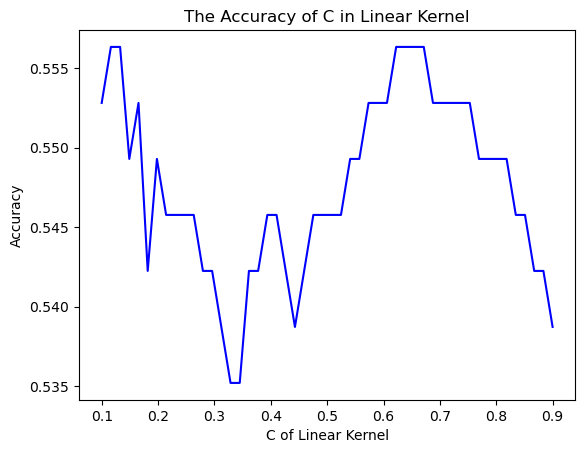

In [3]:
random.seed(10)
Accuracy=[]
for i in np.linspace(0.1,0.9):
    model=LinearSVC(C=i)
    model.fit(x_train,y_train)
    yp_test=model.predict(x_test)
    Accuracy.append(accuracy_score(yp_test,y_test))

plt.plot(np.linspace(0.1,0.9),Accuracy,'b')
plt.title('The Accuracy of C in Linear Kernel')
plt.xlabel('C of Linear Kernel')
plt.ylabel('Accuracy')
plt.grid(False)
plt.show()

In [4]:
# ROC Funtion
from sklearn.preprocessing import LabelBinarizer
def roc(y_test, y_pred, average="micro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average='micro')

------TEST------


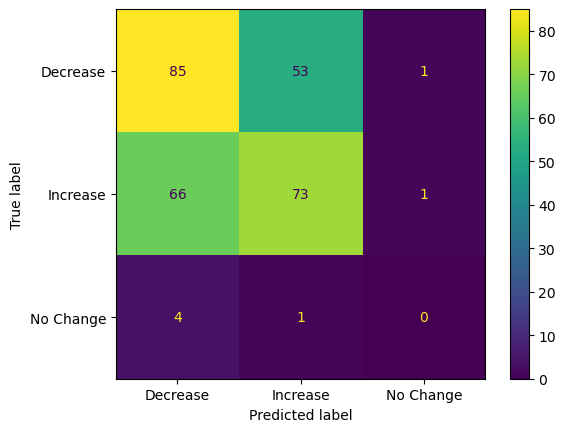

------TEST------
classification_report:
               precision    recall  f1-score   support

    Decrease       0.55      0.61      0.58       139
    Increase       0.57      0.52      0.55       140
   No Change       0.00      0.00      0.00         5

    accuracy                           0.56       284
   macro avg       0.37      0.38      0.38       284
weighted avg       0.55      0.56      0.55       284

Accurary: 0.5563380281690141
F1_score: 0.5563380281690141
AUC_ROC_Score: 0.6672535211267605


In [5]:
model = LinearSVC(C=0.65)
model = model.fit(x_train,y_train)
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

print("------TEST------")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,yp_test),display_labels=model.classes_)
disp.plot()
plt.grid(False)
plt.show()

print("------TEST------")
print("classification_report:\n", classification_report(y_test,yp_test))
print("Accurary:", accuracy_score(y_test,yp_test))
print("F1_score:", f1_score(y_test,yp_test, average='micro'))
print("AUC_ROC_Score:",roc(y_test,yp_test))


## SVC with Poly Kernel

**Hyper-parameter tuning is achieved by changing the kernel and each kernel's C value**

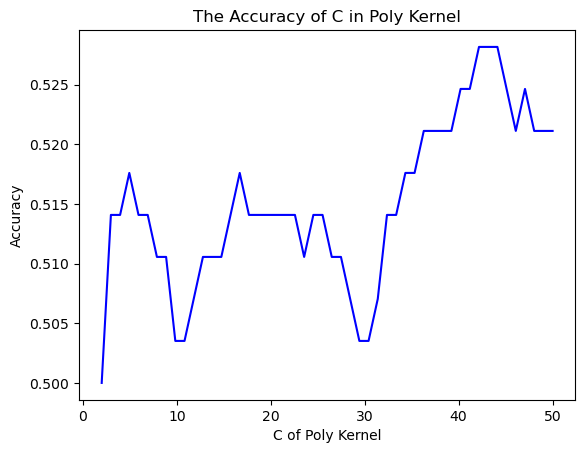

In [6]:
random.seed(10)
Accuracy2=[]
for i in np.linspace(2,50):
    model=SVC(C=i,kernel='poly')
    model.fit(x_train,y_train)
    yp_test=model.predict(x_test)
    Accuracy2.append(accuracy_score(yp_test,y_test))

plt.plot(np.linspace(2,50),Accuracy2,'b')
plt.title('The Accuracy of C in Poly Kernel')
plt.xlabel('C of Poly Kernel')
plt.ylabel('Accuracy')
plt.grid(False)
plt.show()

------TEST------


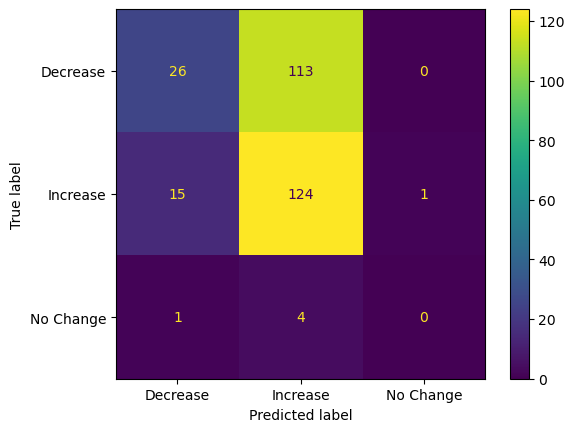

------TEST------
classification_report:
               precision    recall  f1-score   support

    Decrease       0.62      0.19      0.29       139
    Increase       0.51      0.89      0.65       140
   No Change       0.00      0.00      0.00         5

    accuracy                           0.53       284
   macro avg       0.38      0.36      0.31       284
weighted avg       0.56      0.53      0.46       284

Accurary: 0.528169014084507
F1_score: 0.528169014084507
AUC_ROC_Score: 0.6461267605633803


In [7]:
model = SVC(C=43,kernel='poly')
model = model.fit(x_train,y_train)
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

print("------TEST------")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,yp_test),display_labels=model.classes_)
disp.plot()
plt.grid(False)
plt.show()

print("------TEST------")
print("classification_report:\n", classification_report(y_test,yp_test))
print("Accurary:", accuracy_score(y_test,yp_test))
print("F1_score:", f1_score(y_test,yp_test, average='micro'))
print("AUC_ROC_Score:",roc(y_test,yp_test))

## SVC with RBF Kernel

**Hyper-parameter tuning is achieved by changing the kernel and each kernel's C value**

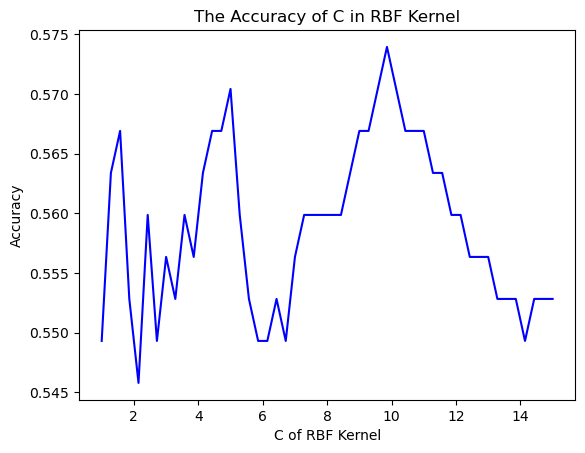

In [8]:
random.seed(10)
Accuracy3=[]
for i in np.linspace(1,15):
    model=SVC(C=i,kernel='rbf')
    model.fit(x_train,y_train)
    yp_test=model.predict(x_test)
    Accuracy3.append(accuracy_score(yp_test,y_test))

plt.plot(np.linspace(1,15),Accuracy3,'b')
plt.title('The Accuracy of C in RBF Kernel')
plt.xlabel('C of RBF Kernel')
plt.ylabel('Accuracy')
plt.grid(False)
plt.show()

------TEST------


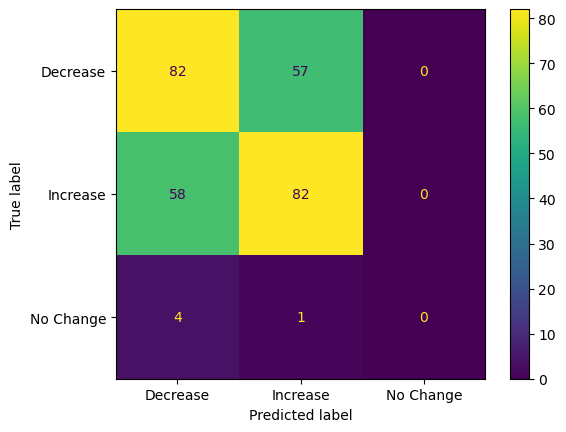

------TEST------
classification_report:
               precision    recall  f1-score   support

    Decrease       0.57      0.59      0.58       139
    Increase       0.59      0.59      0.59       140
   No Change       0.00      0.00      0.00         5

    accuracy                           0.58       284
   macro avg       0.39      0.39      0.39       284
weighted avg       0.57      0.58      0.57       284

Accurary: 0.5774647887323944
F1_score: 0.5774647887323944
AUC_ROC_Score: 0.6830985915492959


/Users/xiaodanlu/miniconda3/envs/anly580/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaodanlu/miniconda3/envs/anly580/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaodanlu/miniconda3/envs/anly580/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [10]:
model = SVC(C=10,kernel='rbf')
model = model.fit(x_train,y_train)
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)
print("------TEST------")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,yp_test),display_labels=model.classes_)
disp.plot()
plt.grid(False)
plt.show()

print("------TEST------")
print("classification_report:\n", classification_report(y_test,yp_test))
print("Accurary:", accuracy_score(y_test,yp_test))
print("F1_score:", f1_score(y_test,yp_test, average='micro'))
print("AUC_ROC_Score:",roc(y_test,yp_test))

## SVC with Sigmoid Kernel

**Hyper-parameter tuning is achieved by changing the kernel and each kernel's C value**

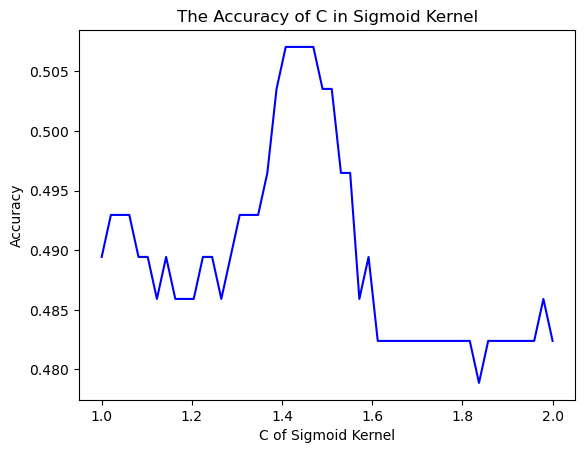

In [9]:
random.seed(10)
Accuracy4=[]
for i in np.linspace(1,2):
    model=SVC(C=i,kernel='sigmoid')
    model.fit(x_train,y_train)
    yp_test=model.predict(x_test)
    Accuracy4.append(accuracy_score(yp_test,y_test))

plt.plot(np.linspace(1,2),Accuracy4,'b')
plt.title('The Accuracy of C in Sigmoid Kernel')
plt.xlabel('C of Sigmoid Kernel')
plt.ylabel('Accuracy')
plt.grid(False)
plt.show()

------TEST------


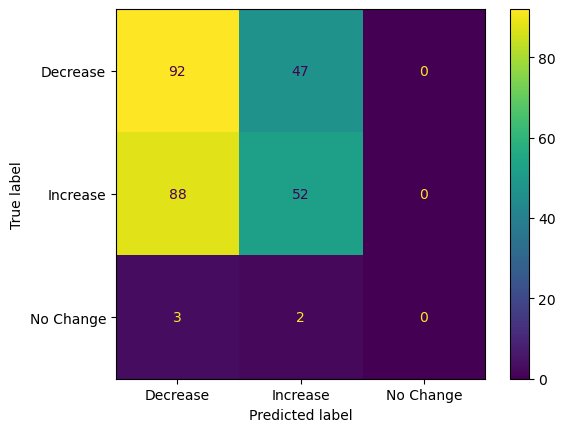

------TEST------
classification_report:
               precision    recall  f1-score   support

    Decrease       0.50      0.66      0.57       139
    Increase       0.51      0.37      0.43       140
   No Change       0.00      0.00      0.00         5

    accuracy                           0.51       284
   macro avg       0.34      0.34      0.33       284
weighted avg       0.50      0.51      0.49       284

Accurary: 0.5070422535211268
F1_score: 0.5070422535211268
AUC_ROC_Score: 0.6302816901408451


/Users/xiaodanlu/miniconda3/envs/anly580/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaodanlu/miniconda3/envs/anly580/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaodanlu/miniconda3/envs/anly580/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [11]:
model = SVC(C=1.45,kernel='sigmoid')
model = model.fit(x_train,y_train)
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)
# Calculate the confusion matrix and classification report for the train and test data. 

print("------TEST------")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,yp_test),display_labels=model.classes_)
disp.plot()
plt.grid(False)
plt.show()

print("------TEST------")
print("classification_report:\n", classification_report(y_test,yp_test))
print("Accurary:", accuracy_score(y_test,yp_test))
print("F1_score:", f1_score(y_test,yp_test, average='micro'))
print("AUC_ROC_Score:",roc(y_test,yp_test))